# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Lectura de los datos
##### Explicación: En este punto se leen las cuatro tipo de señales adquiridas en el laboratorio de ECG. Señales: Reposo 1, Sin respirar, Reposo 2 y En Movimiento

In [3]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_reposo.txt", delimiter="\t")
array2= np.genfromtxt("ECG_sinrespirar1.txt", delimiter="\t")
array3= np.genfromtxt("ECG_reposo2.txt", delimiter="\t")
array4= np.genfromtxt("ECG_movimiento.txt", delimiter="\t")
print(array1)
print(array2)
print(array3)
print(array4)

[[  0.   0.   0. ...   0. 506.  nan]
 [  1.   0.   0. ...   0. 507.  nan]
 [  2.   0.   0. ...   0. 506.  nan]
 ...
 [  9.   0.   0. ...   0. 512.  nan]
 [ 10.   0.   0. ...   0. 510.  nan]
 [ 11.   0.   0. ...   0. 510.  nan]]
[[  0.   0.   0. ...   0. 507.  nan]
 [  1.   0.   0. ...   0. 509.  nan]
 [  2.   0.   0. ...   0. 511.  nan]
 ...
 [  9.   0.   0. ...   0. 527.  nan]
 [ 10.   0.   0. ...   0. 527.  nan]
 [ 11.   0.   0. ...   0. 527.  nan]]
[[  0.   0.   0. ...   0. 507.  nan]
 [  1.   0.   0. ...   0. 508.  nan]
 [  2.   0.   0. ...   0. 509.  nan]
 ...
 [  9.   0.   0. ...   0. 540.  nan]
 [ 10.   0.   0. ...   0. 540.  nan]
 [ 11.   0.   0. ...   0. 537.  nan]]
[[  0.   0.   0. ...   0. 493.  nan]
 [  1.   0.   0. ...   0. 495.  nan]
 [  2.   0.   0. ...   0. 497.  nan]
 ...
 [ 13.   0.   0. ...   0. 497.  nan]
 [ 14.   0.   0. ...   0. 498.  nan]
 [ 15.   0.   0. ...   0. 500.  nan]]


In [4]:
#Nos quedamos con el dato del sensor
# Aclaración del rango: Solo importa la columna "-2", las otras columnas no poseen información útil (0 o nan) como se puede apreciar
d_sensor = array1[:,-2]
print(d_sensor)
d_sensor2 = array2[:,-2]
print(d_sensor2)
d_sensor3= array3[:,-2]
print(d_sensor3)
d_sensor4= array4[:,-2]
print(d_sensor4)

[506. 507. 506. ... 512. 510. 510.]
[507. 509. 511. ... 527. 527. 527.]
[507. 508. 509. ... 540. 540. 537.]
[493. 495. 497. ... 497. 498. 500.]


## Graficación de los datos
##### Se plotean las 4 señales tal cual se obtuvieron en el laboratorio ECG.

(0.0, 5000.0)

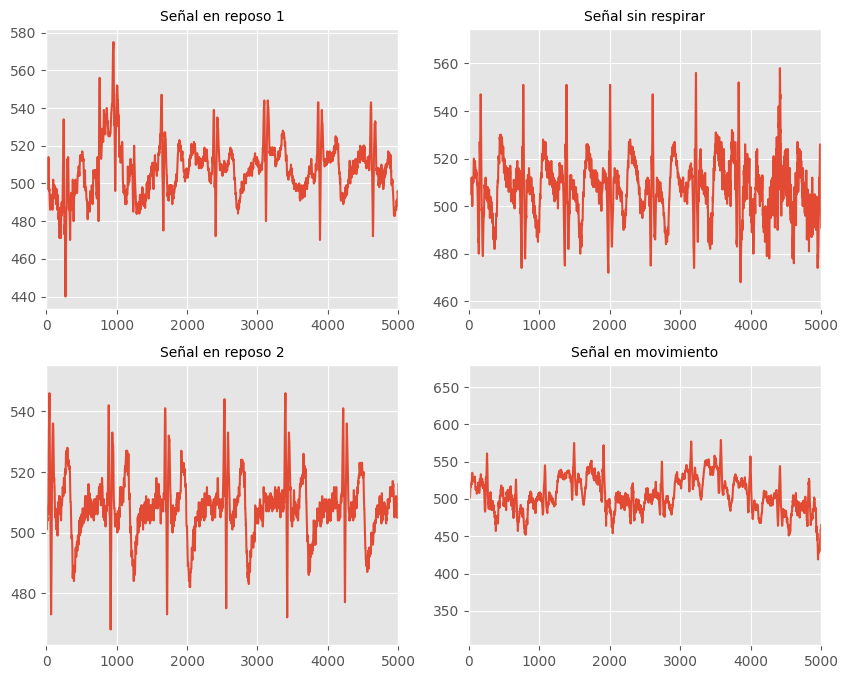

In [5]:
##### Dominio restringido: Hasta 5000
##### Tamaño: 10x8 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(d_sensor)
plt.title("Señal en reposo 1",fontsize=10)
plt.xlim(0,5000)
plt.subplot(2,2,2)
plt.title("Señal sin respirar",fontsize=10)
plt.plot(d_sensor2)
plt.xlim(0,5000)
plt.subplot(2,2,3)
plt.title("Señal en reposo 2",fontsize=10)
plt.plot(d_sensor3)
plt.xlim(0,5000)
plt.subplot(2,2,4)
plt.title("Señal en movimiento",fontsize=10)
plt.plot(d_sensor4)
plt.xlim(0,5000)


## Especificar la Frecuencia de muestreo 

In [6]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
#Para todos los ejercicios la frecuencia de muestreo es la misma aplicada por el dispositivo
Ts=1/Fs
n = np.arange(0,d_sensor.shape[0])  # t = n*Ts
n2= np.arange(0,d_sensor2.shape[0])
n3=np.arange(0,d_sensor3.shape[0])
n4=np.arange(0,d_sensor4.shape[0])
t = n*Ts
t2= n2*Ts
t3= n3*Ts
t4= n4*Ts

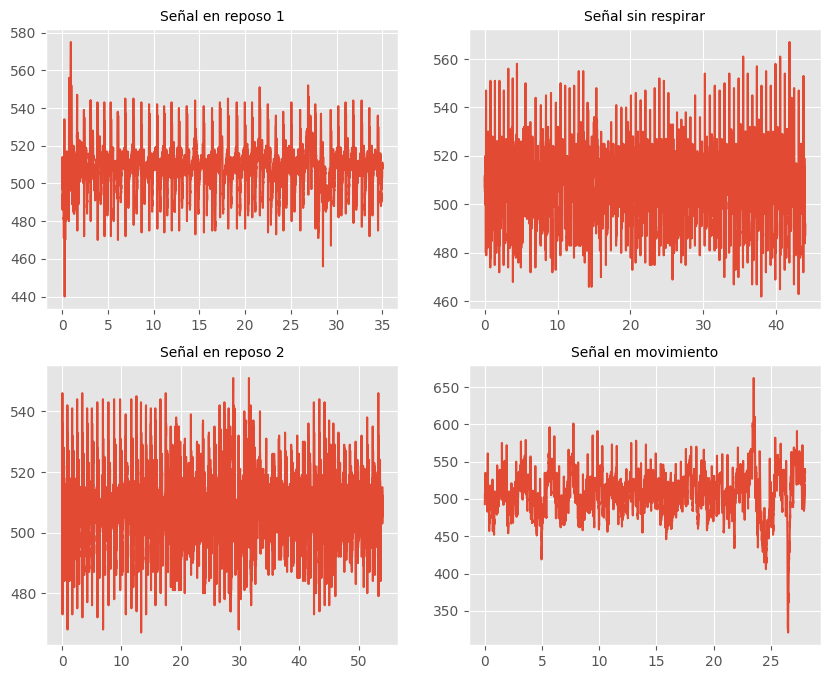

In [7]:
#Ploteamos la señal en el tiempo
#Modificar la cantidad de elementos en el tiempo
# Aclaración:Se delimitaron los rangos de cada señal a los valores mostrados (t1,t2,t3,t4) para que se puedan graficar las señales de menera correcta (evitando errores por tamaño del array)
t=t[0:35000]
t2=t2[0:44000]
t3=t3[0:54000]
t4=t4[0:28000]
#Modificar la cantidad de elementos de cada medida para los ejecutables
d_sensor=d_sensor[0:35000]
d_sensor2=d_sensor2[0:44000]
d_sensor3=d_sensor3[0:54000]
d_sensor4=d_sensor4[0:28000]
#Ploteo de las señales en el tiempo
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("Señal en reposo 1",fontsize=10)
plt.plot(t, d_sensor)
plt.subplot(2,2,2)
plt.title("Señal sin respirar",fontsize=10)
plt.plot(t2,d_sensor2)
plt.subplot(2,2,3)
plt.title("Señal en reposo 2",fontsize=10)
plt.plot(t3, d_sensor3)
plt.subplot(2,2,4)
plt.title("Señal en movimiento",fontsize=10)
plt.plot(t4,d_sensor4)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [8]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t2.reshape(-1,1),  d_sensor2.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t3.reshape(-1,1),  d_sensor3.reshape(-1,1)), axis=1)
st_sensor4 = np.concatenate((t4.reshape(-1,1),  d_sensor4.reshape(-1,1)), axis=1)

In [9]:
#Creamos el data frame con las varibles t y d_sensor
df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
df2 = pd.DataFrame(st_sensor2, columns=["t2","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t3","d_sensor3"])
df4 = pd.DataFrame(st_sensor4, columns=["t4","d_sensor4"])
df.head()

,t,d_sensor
0,0.000,506.0
1,0.001,507.0
2,0.002,506.0
3,0.003,506.0
4,0.004,507.0


In [10]:
df2.head()

,t2,d_sensor2
0,0.000,507.0
1,0.001,509.0
2,0.002,511.0
3,0.003,512.0
4,0.004,511.0


In [11]:
df3.head()

,t3,d_sensor3
0,0.000,507.0
1,0.001,508.0
2,0.002,509.0
3,0.003,507.0
4,0.004,507.0


In [12]:
df4.head()

,t4,d_sensor4
0,0.000,493.0
1,0.001,495.0
2,0.002,497.0
3,0.003,499.0
4,0.004,502.0


In [13]:
#Establecemos t como index 
df = df.set_index("t")
df.head()

,d_sensor
t,
0.000,506.0
0.001,507.0
0.002,506.0
0.003,506.0
0.004,507.0


In [14]:
df2 = df2.set_index("t2")
df2.head()

,d_sensor2
t2,
0.000,507.0
0.001,509.0
0.002,511.0
0.003,512.0
0.004,511.0


In [15]:
df3 = df3.set_index("t3")
df3.head()

,d_sensor3
t3,
0.000,507.0
0.001,508.0
0.002,509.0
0.003,507.0
0.004,507.0


In [16]:
df4 = df4.set_index("t4")
df4.head()

# De esta forma se logra cambiar el índice en pandas, tomando el tiempo como indice

,d_sensor4
t4,
0.000,493.0
0.001,495.0
0.002,497.0
0.003,499.0
0.004,502.0


Text(0.5, 1.0, 'Señal en movimiento')

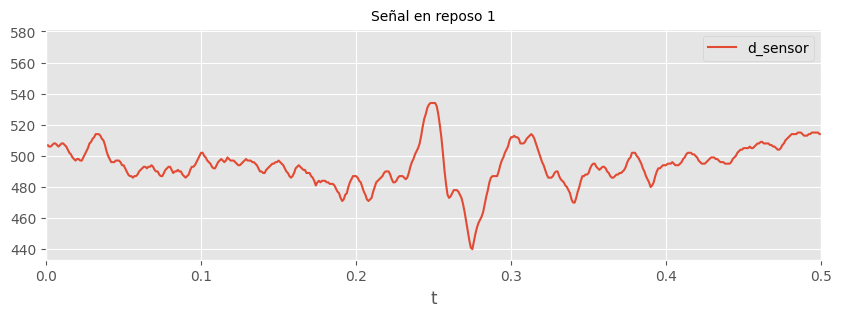

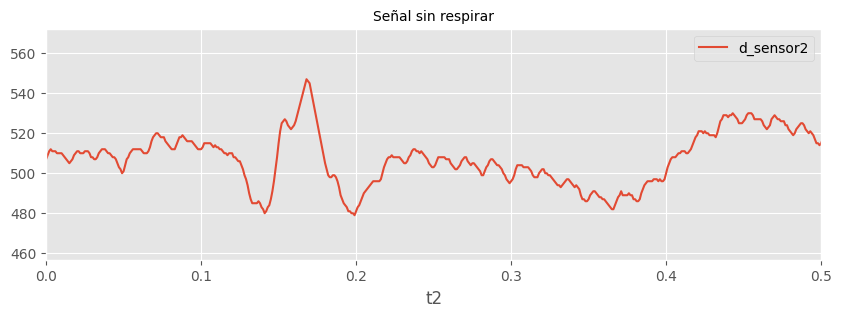

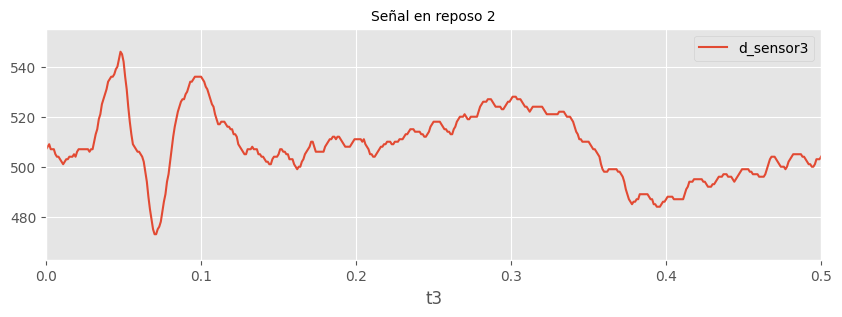

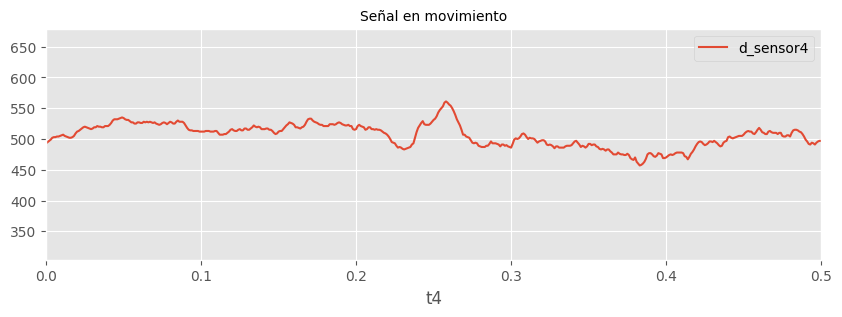

In [17]:
#Ploteamos la señal
# Segmentación de la señal: Ploteamos cada señal con límite de 0.5 s y con un tamaño de 10x3 para obtener el gráfico deseado

df.plot(figsize=(10,3))
plt.xlim(0,0.5)
plt.title("Señal en reposo 1",fontsize=10)

df2.plot(figsize=(10,3))
plt.xlim(0,0.5)
plt.title("Señal sin respirar",fontsize=10)

df3.plot(figsize=(10,3))
plt.xlim(0,0.5)
plt.title("Señal en reposo 2",fontsize=10)


df4.plot(figsize=(10,3))
plt.xlim(0,0.5)
plt.title("Señal en movimiento",fontsize=10)
#####plt.plot(df.index, df.loc[936])#######

Interpretación de las señales: Las señales generadas en estado de reposo presentan similitudes en sus características, variando en el momento que fueron obtenidas (tiempo de adquisición). Las señales en movimiento, debido al esfuerzo físico realizado, presenta picos menos pronunciados.

## Pasando a data tabular estilo Sklearn

Se generan matrices con la data segmentada

In [18]:
v1=df.index.max()/1
v2=df2.index.max()/1
v3=df3.index.max()/1
v4=df4.index.max()/1

In [19]:
df.shape[0]/v1

1000.0285722449212

In [20]:
df2.shape[0]/v2

1000.0227277892678

In [21]:
df3.shape[0]/v3

1000.0185188614604

In [22]:
df4.shape[0]/v4

1000.03571556127

In [23]:
d_obs = df[["d_sensor"]].values.reshape(35,1000)
d_obs

array([[506., 507., 506., ..., 540., 541., 542.],
       [546., 547., 547., ..., 507., 507., 506.],
       [506., 505., 504., ..., 513., 513., 512.],
       ...,
       [504., 504., 505., ..., 516., 516., 514.],
       [512., 513., 514., ..., 505., 505., 504.],
       [503., 503., 503., ..., 510., 508., 508.]])

In [24]:
d_obs2 = df2[["d_sensor2"]].values.reshape(44,1000)
d_obs2

array([[507., 509., 511., ..., 489., 489., 490.],
       [492., 495., 497., ..., 519., 522., 527.],
       [532., 539., 545., ..., 507., 506., 508.],
       ...,
       [510., 509., 508., ..., 519., 519., 519.],
       [520., 518., 515., ..., 498., 497., 497.],
       [497., 496., 496., ..., 489., 491., 492.]])

In [25]:
d_obs3 = df3[["d_sensor3"]].values.reshape(54,1000)
d_obs3

array([[507., 508., 509., ..., 504., 505., 505.],
       [506., 506., 506., ..., 502., 502., 502.],
       [502., 501., 501., ..., 507., 506., 506.],
       ...,
       [506., 508., 508., ..., 508., 509., 511.],
       [511., 511., 512., ..., 511., 512., 513.],
       [513., 512., 512., ..., 510., 512., 512.]])

In [26]:
d_obs4 = df4[["d_sensor4"]].values.reshape(28,1000)
d_obs4

array([[493., 495., 497., ..., 501., 502., 502.],
       [504., 504., 505., ..., 497., 495., 492.],
       [487., 483., 484., ..., 519., 521., 521.],
       ...,
       [506., 508., 509., ..., 486., 484., 483.],
       [484., 483., 484., ..., 539., 539., 540.],
       [544., 547., 551., ..., 535., 536., 536.]])

Text(0.5, 1.0, 'Señal en movimiento')

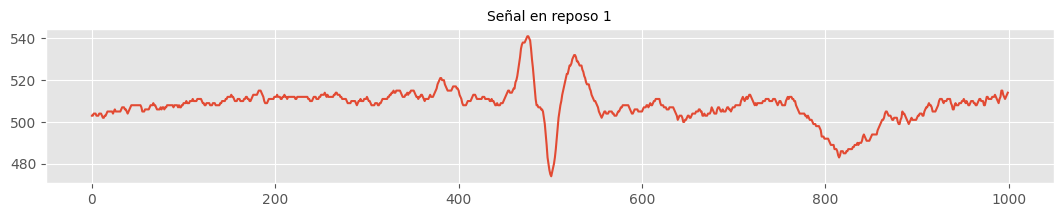

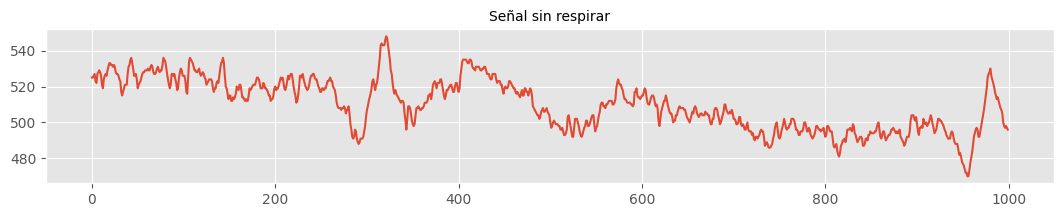

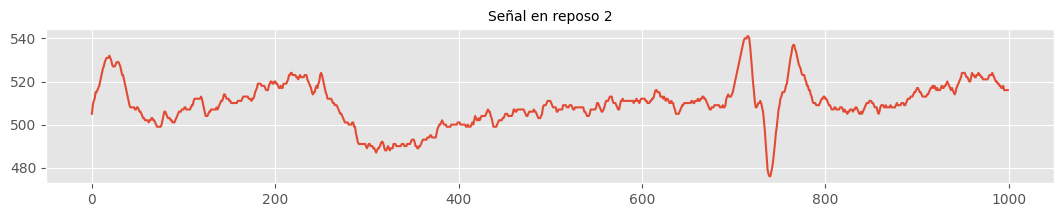

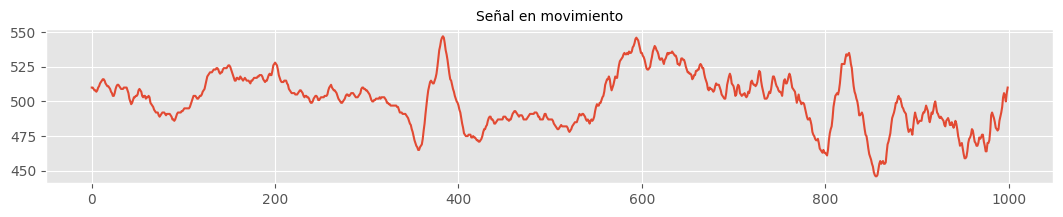

In [27]:
plt.figure(figsize=(13,2))
plt.plot(d_obs[15])
plt.title("Señal en reposo 1",fontsize=10)

plt.figure(figsize=(13,2))
plt.plot(d_obs2[15])
plt.title("Señal sin respirar",fontsize=10)

plt.figure(figsize=(13,2))
plt.plot(d_obs3[15])
plt.title("Señal en reposo 2",fontsize=10)

plt.figure(figsize=(13,2))
plt.plot(d_obs4[15])
plt.title("Señal en movimiento",fontsize=10)

In [28]:
d_obs.shape

(35, 1000)

In [29]:
d_obs2.shape

(44, 1000)

In [30]:
d_obs3.shape

(54, 1000)

In [31]:
d_obs4.shape

(28, 1000)

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |


In [32]:
#array4 = np.concatenate((array3,  np.repeat(0, array3.shape[0]).reshape(-1,1)), axis=1)

# Creamos una categoría
target_0 = np.repeat(0, array1.shape[0])
target_0

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
target_1 = np.repeat(0, array2.shape[0])
target_1

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
target_2 = np.repeat(0, array3.shape[0])
target_2

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
target_3 = np.repeat(0, array4.shape[0])
target_3

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
ecg = {"reposo1": d_obs, "target": target_0}
ecg

{'reposo1': array([[506., 507., 506., ..., 540., 541., 542.],
        [546., 547., 547., ..., 507., 507., 506.],
        [506., 505., 504., ..., 513., 513., 512.],
        ...,
        [504., 504., 505., ..., 516., 516., 514.],
        [512., 513., 514., ..., 505., 505., 504.],
        [503., 503., 503., ..., 510., 508., 508.]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [37]:
ecg2 = {"sin respirar": d_obs2, "target": target_1}
ecg2

{'sin respirar': array([[507., 509., 511., ..., 489., 489., 490.],
        [492., 495., 497., ..., 519., 522., 527.],
        [532., 539., 545., ..., 507., 506., 508.],
        ...,
        [510., 509., 508., ..., 519., 519., 519.],
        [520., 518., 515., ..., 498., 497., 497.],
        [497., 496., 496., ..., 489., 491., 492.]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [38]:
ecg3 = {"reposo2": d_obs3, "target": target_2}
ecg3

{'reposo2': array([[507., 508., 509., ..., 504., 505., 505.],
        [506., 506., 506., ..., 502., 502., 502.],
        [502., 501., 501., ..., 507., 506., 506.],
        ...,
        [506., 508., 508., ..., 508., 509., 511.],
        [511., 511., 512., ..., 511., 512., 513.],
        [513., 512., 512., ..., 510., 512., 512.]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [39]:
ecg4 = {"en movimiento": d_obs4, "target": target_3}
ecg4

{'en movimiento': array([[493., 495., 497., ..., 501., 502., 502.],
        [504., 504., 505., ..., 497., 495., 492.],
        [487., 483., 484., ..., 519., 521., 521.],
        ...,
        [506., 508., 509., ..., 486., 484., 483.],
        [484., 483., 484., ..., 539., 539., 540.],
        [544., 547., 551., ..., 535., 536., 536.]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [50]:
concatenate1=np.concatenate((d_obs,d_obs2))
target_con1= np.concatenate((target_0,target_1))
concatenate1

array([[506., 507., 506., ..., 540., 541., 542.],
       [546., 547., 547., ..., 507., 507., 506.],
       [506., 505., 504., ..., 513., 513., 512.],
       ...,
       [510., 509., 508., ..., 519., 519., 519.],
       [520., 518., 515., ..., 498., 497., 497.],
       [497., 496., 496., ..., 489., 491., 492.]])

In [51]:
concatenate2=np.concatenate((d_obs3,d_obs4))
target_con2= np.concatenate((target_2,target_3))
concatenate2

array([[507., 508., 509., ..., 504., 505., 505.],
       [506., 506., 506., ..., 502., 502., 502.],
       [502., 501., 501., ..., 507., 506., 506.],
       ...,
       [506., 508., 509., ..., 486., 484., 483.],
       [484., 483., 484., ..., 539., 539., 540.],
       [544., 547., 551., ..., 535., 536., 536.]])

In [52]:
concatenate_final=np.concatenate((concatenate1,concatenate2))
target_final= np.concatenate((target_con1,target_con2))
concatenate_final

array([[506., 507., 506., ..., 540., 541., 542.],
       [546., 547., 547., ..., 507., 507., 506.],
       [506., 505., 504., ..., 513., 513., 512.],
       ...,
       [506., 508., 509., ..., 486., 484., 483.],
       [484., 483., 484., ..., 539., 539., 540.],
       [544., 547., 551., ..., 535., 536., 536.]])

In [53]:
ecg_final = {"total": concatenate_final,"target": target_final}
ecg_final

{'total': array([[506., 507., 506., ..., 540., 541., 542.],
        [546., 547., 547., ..., 507., 507., 506.],
        [506., 505., 504., ..., 513., 513., 512.],
        ...,
        [506., 508., 509., ..., 486., 484., 483.],
        [484., 483., 484., ..., 539., 539., 540.],
        [544., 547., 551., ..., 535., 536., 536.]]),
 'target': array([0, 0, 0, ..., 0, 0, 0])}

In [40]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     - -------------------------------------- 0.4/8.3 MB 12.9 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/8.3 MB 24.7 MB/s eta 0:00:01
     ----------------- ---------------------- 3.6/8.3 MB 28.4 MB/s eta 0:00:01
     -------------------------- ------------- 5.5/8.3 MB 32.1 MB/s eta 0:00:01
     ----------------------------------- ---- 7.2/8.3 MB 30.9 MB/s eta 0:00:01
     ---------------------------------------  8.3/8.3 MB 33.0 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 27.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/298.0 kB ? eta -:--:--
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Estilo sklearn de almacenamiento de dataset

In [64]:
from sklearn.datasets import load_breast_cancer

In [65]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Tarea

Crear un dataset con toda la información de la señal de ECG que contenga:
---> Base : Data observada en estado de reposo
---> Post_ejercicio : Data observada despues de ejercicio 
ETC..